<a href="https://colab.research.google.com/github/abhishekDey11209/ML-projects/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Importing the dataset

In [3]:
df = pd.read_csv("Position_Salaries.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [23]:
X = df.iloc[ : , 1:-1].values
y = df.iloc[:,-1].values

In [25]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [26]:
#converting y into 2d array
y = y.reshape(len(y),1)

In [27]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
#scaler of matrix of feature X
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
#scaler of matrix of feature y
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [29]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [30]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [35]:
#predicting the salary for 6.5 years of exp
#reverse scaling so to get the salary
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

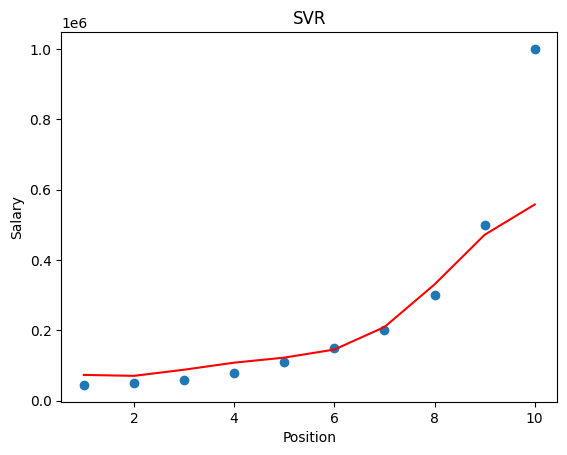

In [37]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y))
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = "red")
plt.title('SVR')
plt.xlabel('Position')
plt.ylabel('Salary')

## Visualising the SVR results (for higher resolution and smoother curve)

In [39]:
x_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
x_grid = x_grid.reshape(len(x_grid),1)

Text(0, 0.5, 'Salary')

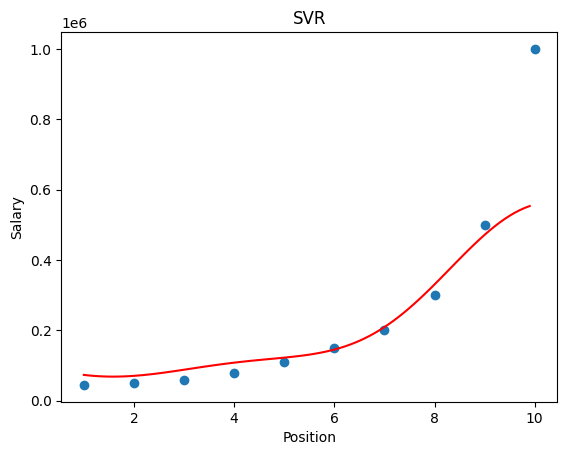

In [43]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y))
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = "red")
plt.title('SVR')
plt.xlabel('Position')
plt.ylabel('Salary')